<a href="https://colab.research.google.com/github/AlexandraMihalevschi/Data_Science/blob/main/Model_de_predic%C8%9Bie_p_u_Concurs_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mai întâi este nevoie să importăm datele și restul de ce avem nevoie

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('https://girlsgoitpublic.z6.web.core.windows.net/movies_train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies

,movie_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income,popularity
0,0,Suéltate el pelo,Suéltate el pelo,1988,1988-07-13,"Comedy, Musical",100,Spain,Spanish,Manuel Summers,"Francisco Summers, Manuel Summers",Francisco Lara Polop P.C.,"David Summers, Daniel Mezquita, Rafael Gutiérr...",NaN,NaN,NaN,NaN,unpopular
1,1,Mister Johnson,Mister Johnson,1990,1991-06-14,Drama,101,USA,English,Bruce Beresford,"William Boyd, Joyce Cary",Avenue Pictures,"Maynard Eziashi, Pierce Brosnan, Edward Woodwa...","In 1923, a local resident of British Colonial ...",NaN,$ 1464242,$ 1464242,popular
2,2,Gelosia,Wife vs. Secretary,1936,1936-02-28,"Comedy, Drama, Romance",88,USA,English,Clarence Brown,"Norman Krasna, John Lee Mahin",Metro-Goldwyn-Mayer (MGM),"Clark Gable, Jean Harlow, Myrna Loy, May Robso...",The wife of a publishing executive mistakenly ...,$ 519000,NaN,NaN,popular
3,3,Uno sbirro nella notte,Killing Blue,1988,1988-11-03,Thriller,95,West Germany,"English, German",Peter Patzak,"Julia Kent, Paul Nicholas",K.S. Film,"Armin Mueller-Stahl, Morgan Fairchild, Frank S...",Police Commissioner Alex Glass has been twiste...,NaN,NaN,NaN,unpopular
4,4,"Ride, Ranger, Ride","Ride, Ranger, Ride",1936,1936-09-30,Western,63,USA,English,Joseph Kane,"Dorrell McGowan, Stuart E. McGowan",Republic Pictures (I),"Gene Autry, Smiley Burnette, Kay Hughes, Monte...",Gene is a Texas Ranger working under cover to ...,NaN,NaN,NaN,unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75850,75850,Venom,Venom,2005,2005-09-16,Horror,87,USA,English,Jim Gillespie,"Flint Dille, John Zuur Platten",Dimension Films,"Agnes Bruckner, Jonathan Jackson, Laura Ramsey...",A group of teenagers fear for their lives in t...,NaN,$ 881779,$ 881779,unpopular
75851,75851,Chorabali,Chorabali,2016,2016-01-22,"Drama, Mystery, Thriller",108,India,"Bengali, English",Subhrajit Mitra,Agatha Christie,Angel Digital Private Limited,"Barun Chanda, Tanushree Chakraborty, George Ba...",A whodunit thriller set in the backdrop of Nor...,NaN,NaN,NaN,unpopular
75852,75852,Smugglers' Cove,Smugglers' Cove,1948,1948-10-10,"Comedy, Crime",66,USA,English,William Beaudine,"Edmond Seward, Tim Ryan",Monogram Pictures,"Leo Gorcey, Huntz Hall, Gabriel Dell, Martin K...",Slip mistakenly believes that he has inherited...,NaN,NaN,NaN,popular
75853,75853,I cacciatori dell'oro,The Spoilers,1942,1942-06-11,"Drama, Western",87,USA,English,Ray Enright,"Rex Beach, Lawrence Hazard",Universal Pictures,"Marlene Dietrich, Randolph Scott, John Wayne, ...","In Nome, Alaska, miner Roy Glennister and his ...",NaN,NaN,NaN,popular


In [ ]:
mov = movies.dropna()
mov.loc['year'] = mov['year'].astype('int')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
mov['budget'].value_counts()

$ 10000000     249
$ 20000000     243
$ 15000000     220
$ 30000000     207
$ 25000000     207
              ... 
CAD 2800000      1
DEM 800000       1
AUD 3992880      1
$ 1650000        1
$ 217000000      1
Name: budget, Length: 999, dtype: int64

In [ ]:
mov['budget'] = mov['budget'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mov['budget'].value_counts()

 10000000     249
 20000000     243
 15000000     220
 25000000     207
 30000000     207
             ... 
 25500000       1
EUR 100000      1
 320000         1
 270000000      1
 15700000       1
Name: budget, Length: 999, dtype: int64

In [ ]:
mov['budget'] = pd.to_numeric(mov['budget'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mov = mov.dropna(subset=['budget'])
mov['budget']

42       48000000.0
72         650000.0
79        6400000.0
82       14000000.0
96       25000000.0
            ...    
75781    13000000.0
75799    30000000.0
75817    15000000.0
75820    35000000.0
75847    10000000.0
Name: budget, Length: 6367, dtype: float64

In [ ]:
# mov['budget'] = mov['budget'].astype('int')
mov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6367 entries, 42 to 75847
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               6367 non-null   float64
 1   title                  6367 non-null   object 
 2   original_title         6367 non-null   object 
 3   year                   6367 non-null   object 
 4   date_published         6367 non-null   object 
 5   genre                  6367 non-null   object 
 6   duration               6367 non-null   float64
 7   country                6367 non-null   object 
 8   language               6367 non-null   object 
 9   director               6367 non-null   object 
 10  writer                 6367 non-null   object 
 11  production_company     6367 non-null   object 
 12  actors                 6367 non-null   object 
 13  description            6367 non-null   object 
 14  budget                 6367 non-null   float64
 15  usa_gro

In [ ]:
from sklearn.model_selection import train_test_split

X=mov[['budget', 'year', 'duration']] 
y=mov['popularity']  

# Divizăm datasetul în setul de antrenament și cel pentru testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#parameters = ['year', 'duration']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.kdeplot(data=mov, x='year', hue="popularity")

In [ ]:
#X = mov[parameters]
#y = mov['popularity']

In [ ]:
#mov = mov.sample(frac=1)

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Creăm clasificatorul RandomForest
clf=RandomForestClassifier(n_estimators=100,bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
#RandomForestClassifier(n_estimators=100)
"""(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False
"""

#Antrenăm modelul pe datele noastre
clf.fit(X_train,y_train)

#Stocăm valoarea prezicerilor într-o variabilă 
y_pred=clf.predict(X_test)

In [ ]:
#clf = DecisionTreeClassifier(criterion= 'entropy')  

In [ ]:
#clf.fit(X_train, y_train)

In [ ]:
"""
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,
                class_names=['Popular' ,'Unpopular'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
"""

"\nfrom sklearn.tree import export_graphviz\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nimport pydotplus\n\ndot_data = StringIO()\nexport_graphviz(clf, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True,feature_names = X.columns,\n                class_names=['Popular' ,'Unpopular'])\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png('diabetes.png')\nImage(graph.create_png())\n"

In [ ]:
#y_predict = clf.predict(X_test)

In [ ]:
y_pred

array(['popular', 'popular', 'popular', ..., 'popular', 'popular',
       'popular'], dtype=object)

In [ ]:
y_test

19243    unpopular
7880       popular
28284      popular
9831       popular
22669      popular
           ...    
55073      popular
38968      popular
14173      popular
50139      popular
28787      popular
Name: popularity, Length: 1911, dtype: object

In [ ]:
#df_test_predict = pd.DataFrame({'y_test': y_test, 'y_predict' : y_predict})
#df_test_predict

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
accuracy_score(y_test, y_pred)

0.673992673992674

In [ ]:
precision_score(y_test, y_pred, pos_label='popular')

0.7120894479385046

In [ ]:
recall_score(y_test, y_pred, pos_label='popular')

0.8284552845528456

In [ ]:
f1_score(y_test, y_pred, pos_label='popular')

0.7658774896655393

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

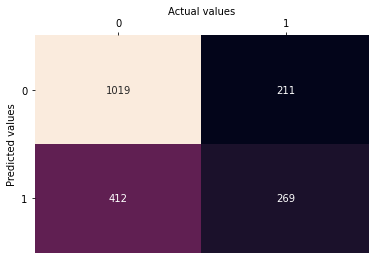

In [ ]:
ax = sns.heatmap(conf_mx, annot=True, fmt="d", cbar=False)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.yticks(rotation=0)

In [ ]:
y_train_predict = clf.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_predict)

0.7221723518850988

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
acc = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
print(acc)
print()
print('Mean:', acc.mean())
print()
print('Std:', acc.std())

[0.6978022  0.68838305 0.68263943 0.67714061 0.67556952]

Mean: 0.6843069622555651

Std: 0.008114381490747155


In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#parameters = {'n_estimators': [50, 60, 70, 80, 90, 100, 120, 150],
#              'max_depth': [3, 4, 5, 6, 7]}

In [ ]:
#gscv = GridSearchCV(clf, parameters)

In [ ]:
#gscv.fit(X_train,y_train)

In [ ]:
#gscv.best_score_

In [ ]:
#gscv.best_estimator_

In [ ]:
test = pd.read_csv('https://girlsgoitpublic.z6.web.core.windows.net/movies_test.csv')

In [ ]:
test

,movie_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income
0,0,Familia,Familia,2005,2006-08-09,Drama,102,Canada,French,Louise Archambault,Louise Archambault,micro_scope,"Sylvie Moreau, Macha Grenon, Juliette Gosselin...",This emotionally-charged story of mothers and ...,NaN,NaN,$ 2365
1,1,Macondo,Macondo,2014,2014-11-14,Drama,98,Austria,"German, Chechen, Arabic",Sudabeh Mortezai,Sudabeh Mortezai,FreibeuterFilm,"Ramasan Minkailov, Aslan Elbiev, Kheda Gazieva...",An 11-year-old Chechnyan refugee living in Vie...,NaN,NaN,$ 46300
2,2,Miles from Home,Miles from Home,2006,2006-02-01,Drama,97,USA,English,Ty Hodges,Ty Hodges,Lab 601,"Erik Aude, Taisha Monique Clark, Amy Correa, M...","Plagued by bad influences, bad choices and bad...",NaN,NaN,NaN
3,3,Maz swojej zony,Maz swojej zony,1961,1961-04-04,Comedy,94,Poland,Polish,Stanislaw Bareja,"Stanislaw Bareja, Jerzy Jurandot",P.P. Film Polski,"Bronislaw Pawlik, Aleksandra Zawieruszanka, Mi...",NaN,NaN,NaN,NaN
4,4,Marutai no onna,Marutai no onna,1997,1997-09-27,"Comedy, Crime, Drama",131,Japan,Japanese,Jûzô Itami,Jûzô Itami,Itami Productions,"Nobuko Miyamoto, Masahiko Nishimura, Yuji Mura...",A vain actress who witnessed a serious crime i...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,The Unseen,The Unseen,2005,2005-09-24,Drama,99,USA,English,Lisa France,Lisa France,Luis Moro Productions,"Steve Harris, Gale Harold, Phillip Bloch, Cath...",A film by Lisa France. A Luis Moro Production....,NaN,NaN,NaN
9996,9996,Duplicity,Duplicity,2009,2009-04-10,"Comedy, Crime, Romance",125,"USA, Germany","English, Spanish, Russian, German",Tony Gilroy,Tony Gilroy,Universal Pictures,"Clive Owen, Julia Roberts, Tom Wilkinson, Paul...",Two ex-government agents turned rival industri...,$ 60000000,$ 40572825,$ 78176181
9997,9997,Mektup,Mektup,1997,1997-09-26,Drama,100,Turkey,Turkish,Ali Özgentürk,Ali Özgentürk,NaN,"Tarik Akan, Necdet Mahfi Ayral, Ihsan Bilsel, ...",A man researches the death of his political ac...,NaN,NaN,NaN
9998,9998,Il matrimonio che vorrei,Hope Springs,2012,2012-10-18,"Comedy, Drama, Romance",100,"USA, Canada",English,David Frankel,Vanessa Taylor,Columbia Pictures,"Meryl Streep, Tommy Lee Jones, Steve Carell, J...","After thirty years of marriage, a middle-aged ...",$ 30000000,$ 63536011,$ 114281051


In [ ]:
X_test = test[['year', 'duration', 'budget']]
X_test

,year,duration,budget
0,2005,102,NaN
1,2014,98,NaN
2,2006,97,NaN
3,1961,94,NaN
4,1997,131,NaN
...,...,...,...
9995,2005,99,NaN
9996,2009,125,$ 60000000
9997,1997,100,NaN
9998,2012,100,$ 30000000


In [ ]:
X_test['budget'] = X_test['budget'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test['budget'] = pd.to_numeric(X_test['budget'], errors='coerce')
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,duration,budget
0,2005,102,NaN
1,2014,98,NaN
2,2006,97,NaN
3,1961,94,NaN
4,1997,131,NaN
...,...,...,...
9995,2005,99,NaN
9996,2009,125,60000000.0
9997,1997,100,NaN
9998,2012,100,30000000.0


In [ ]:
test_miss_val1 = X_test.copy()

In [ ]:
rating_mean = test_miss_val1['budget'].mean()
rating_mean

13124227.588205129

In [ ]:
test_miss_val1['budget'].fillna(rating_mean, inplace=True)

In [ ]:
#X_test = test.dropna(subset=['budget'])
#X_test

In [ ]:
y_predict = clf.predict(test_miss_val1)

In [ ]:
y_predict

array(['popular', 'popular', 'popular', ..., 'popular', 'popular',
       'popular'], dtype=object)

In [ ]:
test_predict = pd.DataFrame({'movie_id': test['movie_id'], 'popularity' : y_predict})
test_predict

,movie_id,popularity
0,0,popular
1,1,popular
2,2,popular
3,3,popular
4,4,popular
...,...,...
9995,9995,popular
9996,9996,popular
9997,9997,popular
9998,9998,popular


In [ ]:
test_predict.to_csv('IMDb_movies_predict.csv', index = False)